First we need to install a package to allow us to connect and read databases, I have chosen 'DBcm' as i have used it before,

We install this by going windows icon -> cmd - > and typing in this command,

##### <span style="color:limegreen">py -m pip install dbcm</span>

<i><u> For mac & chromebook we run terminal instead of cmd!</u></i>

#
#

This tutorial is also using 'Maria DB' for its databases you can use any database software but the SQL statement below and how you create a table may change,

#

Below is how you insert data into a database, with a database user named 'exampleUser' and its password being 'somePassword'

#

The commands to create the table and user in MariaDB look like this, note their will be two installed applications with Maria DB, "MYSQL CLIENT" & "COMMAND PROMPT (MARIADB)"  

#

(NOTE: you need to include the ; at the end of the statements):

#

***************** IN MYQL CLIENT PROMPT: *****************

- create database exampledatabase;
- show databases;
- grant all on exampledatabase.* to 'exampleUser' identified by 'somePassword';

#

***************** IN MARIADB COMMAND PROMPT: *****************

- mysql -u exampleUser -p exampledatabase
- *TYPE IN* somePassword
- create table playerInfo ( name varchar(64) not null, age int(3), score int);
- show tables;
- describe playerInfo;

#

It should look like this:

#

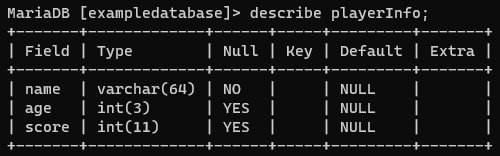

In [1]:
import DBcm

In [2]:
Data = []

SQL = """
    insert into playerInfo (name, age, score) values ( %s, %s, %s)
"""

config = {
    'host': '127.0.0.1',
    'database': 'ExampleDatabase',
    'user': 'exampleUser',
    'password': 'somePassword',
}

Below is code on how you get/insert data into a database

In [3]:
name = "Andrew"
Age = 23
Score = 1000

In [4]:
with DBcm.UseDatabase(config) as db:
    db.execute(SQL, (name, Age , Score))

Below is how you get data from a database, with a database with the same user

In [5]:
SQLGETALL = """
    select * from playerInfo
"""

In [15]:
with DBcm.UseDatabase(config) as db:
        db.execute(SQLGETALL)
        data = db.fetchall()

        #print each row entry as seprate lines
        for row in data:
                print("Name: ", row[0])
                print("Age: ", row[1])
                print("Score: ", row[2])
                print("\n")

Name:  Andrew
Age:  23
Score:  1000


